In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [63]:
#Importing dataset
train_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
test_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [64]:
#Checking columns of each dataset
print('Train data columns are: ', train_df.columns)
print('Test data columns are: ', test_df.columns)

Train data columns are:  Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')
Test data columns are:  Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [65]:
#Checking dimensions of train dataset
train_df.shape

(31647, 18)

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [67]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [68]:
#Checking dimensions of test dataset
test_df.shape

(13564, 17)

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [70]:
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

### Both datasets do not have null values. 17 features are same. "Subscribed" variable to be predicted. 

In [71]:
#Analysis of "Subscribed" variable
train_df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

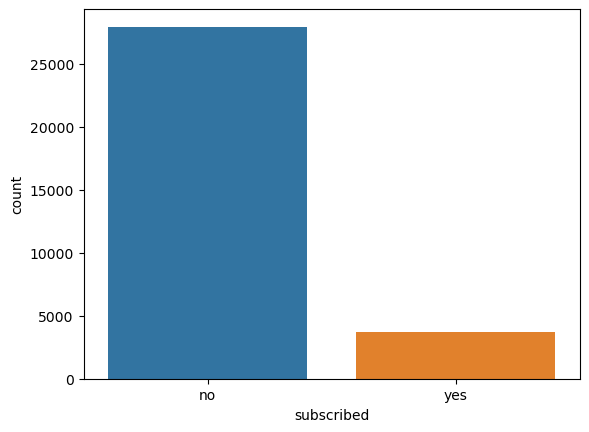

In [72]:
sns.countplot(data=train_df, x='subscribed')

In [73]:
#Normalizing the frequency table of 'Subscribed' variable
train_df['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [74]:
#Analyzing other variables-

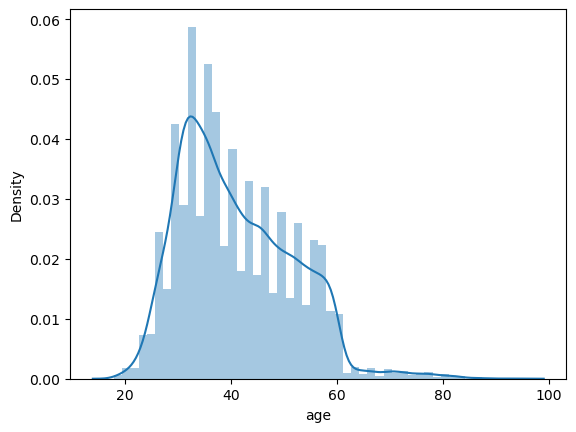

In [75]:
#"Age" Analysis
sns.distplot(train_df['age']);

In [76]:
#"Job" Analysis
train_df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

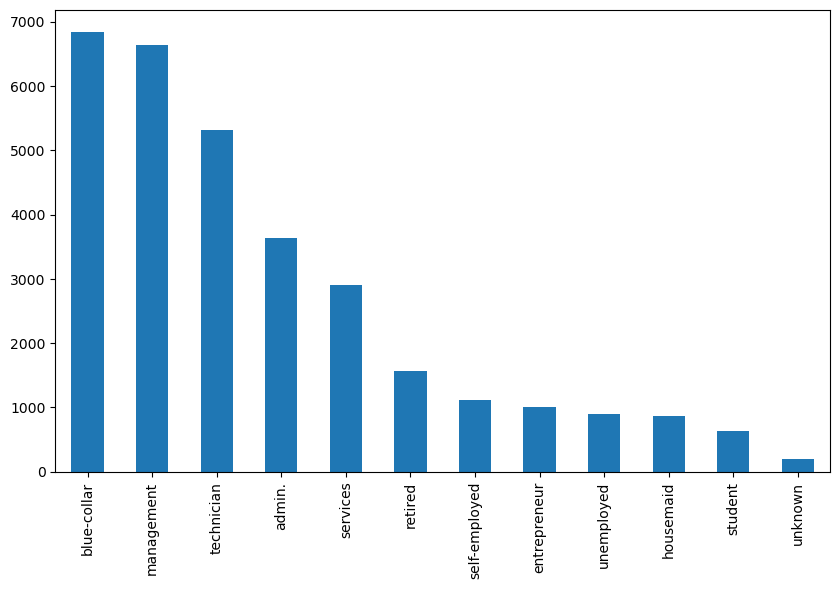

In [77]:
train_df['job'].value_counts().plot(kind='bar', figsize=(10,6));

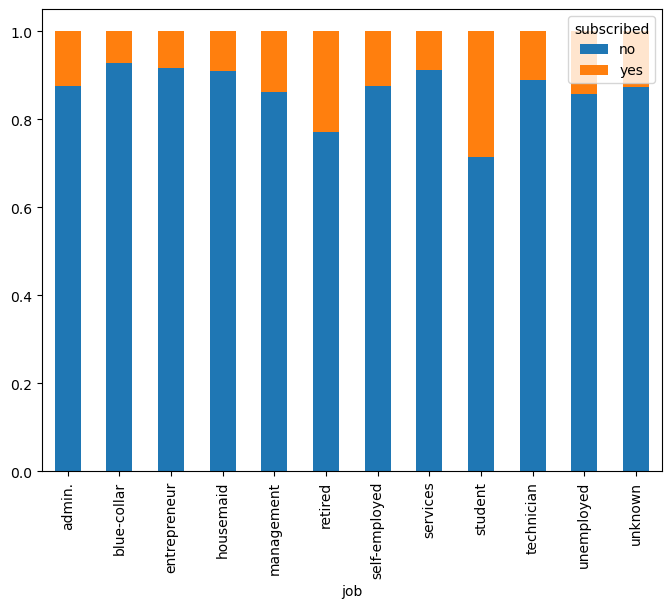

In [78]:
job = pd.crosstab(train_df['job'],train_df['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [79]:
#"Marital Status" Analysis
train_df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

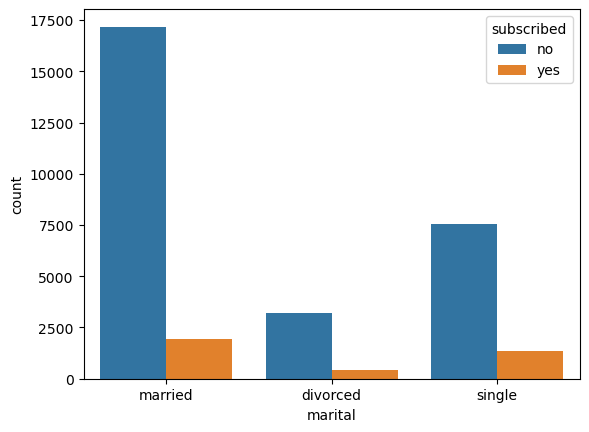

In [80]:
sns.countplot(data=train_df, x='marital', hue='subscribed');

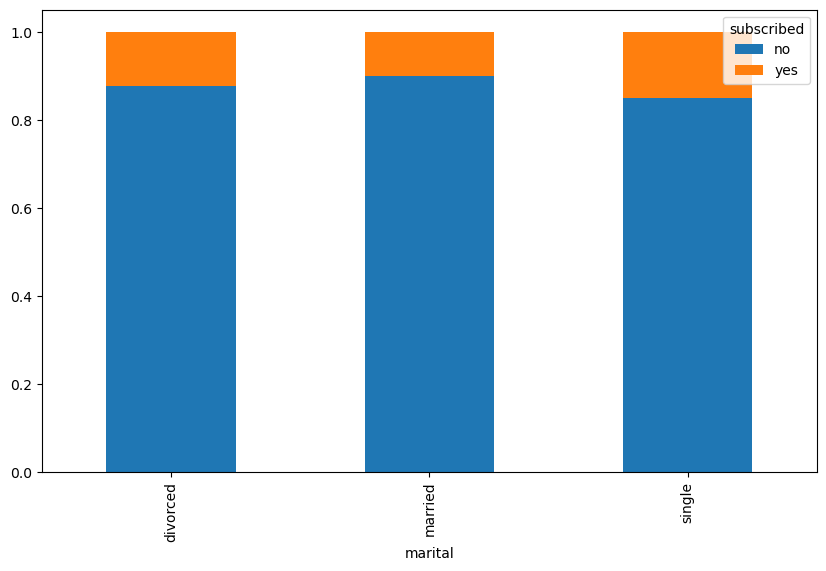

In [81]:
marital = pd.crosstab(train_df['marital'], train_df['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm.plot.bar(stacked=True, figsize=(10,6));

<Axes: xlabel='default'>

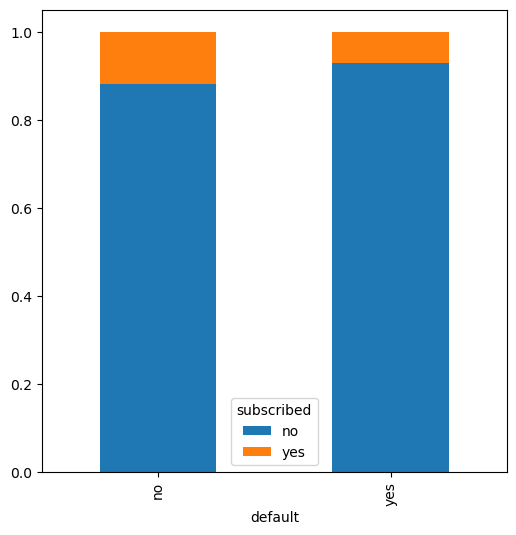

In [82]:
#"Default" Analysis
dflt = pd.crosstab(train_df['default'], train_df['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

## Findings:

1. Most of the clients are between age group 20-60 years.
2. Students and retired have subscribed more to the term deposits.
3. Marital Status do not ave much impact on the term deposits subscription.
4. The clients with no defaults have higher chances of subscribing term deposits as compared to defaulters.

In [83]:
# Converting the target variables into 0s and 1s
train_df['subscribed'].replace('no', 0,inplace=True)
train_df['subscribed'].replace('yes', 1,inplace=True)

In [84]:
train_df['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [85]:
#Correlation matrix
tc = train_df.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

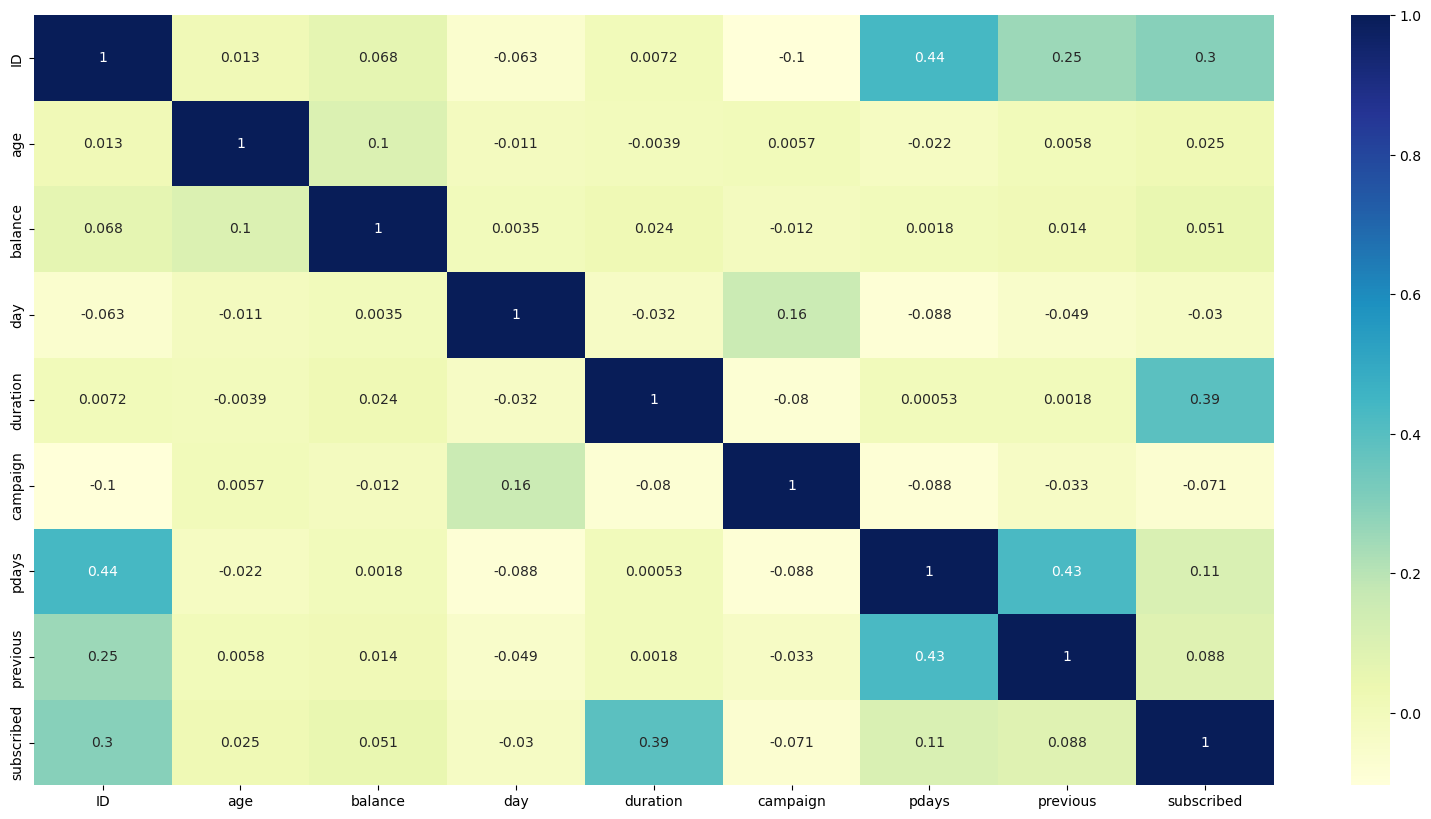

In [86]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

In [87]:
#Model Building

In [88]:
target = train_df['subscribed']
train_df = train_df.drop('subscribed', axis=1)

In [89]:
#Generating dummy values on the train dataset
train_df = pd.get_dummies(train_df)
train_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
X_train, X_val, y_train, y_val = train_test_split(train_df, target, test_size=0.2, random_state=12)

In [91]:
#Applying Logistic Regression, since it is classification problem.

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
#Creating an object of logistic regression model
lreg = LogisticRegression()

In [94]:
#Fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [95]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [96]:
#Checking the accurancy of our model
from sklearn.metrics import accuracy_score

In [97]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8868878357030016

In [98]:
#Applying Decision Tree to deal with non-linearity
from sklearn.tree import DecisionTreeClassifier

In [99]:
#Creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [100]:
#Fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [101]:
#Making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9042654028436019

In [103]:
#Making prediction on test dataset-

In [104]:
test_df = pd.get_dummies(test_df)
test_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [105]:
test_pred = clf.predict(test_df)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [106]:
predictions = pd.DataFrame()

In [108]:
predictions['ID'] = test_df['ID']
predictions['subscribed'] = test_pred

In [109]:
predictions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [110]:
predictions['subscribed'].replace(0,'no',inplace=True)
predictions['subscribed'].replace(1,'yes',inplace=True)

In [111]:
predictions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [113]:
#Frequency of 'subscribed'
predictions['subscribed'].value_counts()

no     12103
yes     1461
Name: subscribed, dtype: int64